<a href="https://colab.research.google.com/github/NP-15/Machine-learning/blob/main/Sessions/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dataset

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import datasets
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Machine-learning-main/assets/Social_Network_Ads.csv')
knn = pd.DataFrame()
df["Gender"].replace("Male",  0, inplace=True)
df["Gender"].replace("Female",  1, inplace=True)
df = df.drop("User ID", axis='columns')
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


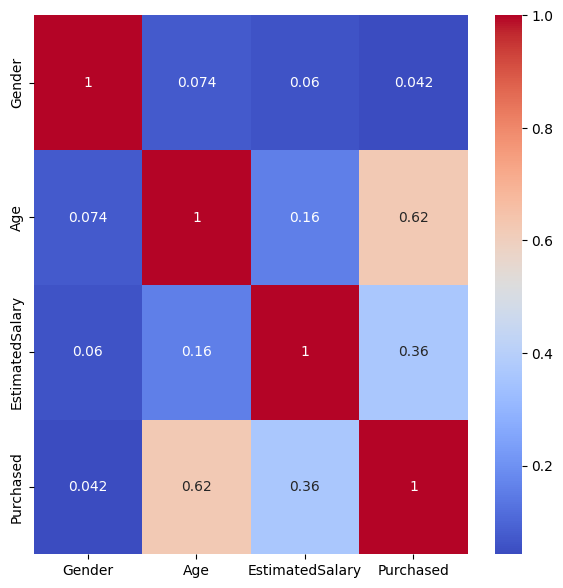

In [7]:
corr = df.corr()
plt.figure(figsize=(7, 7))
sb.heatmap(corr, cmap='coolwarm', annot=True)

plt.show()

In [8]:
corr_threshold = 0.1
selected_features = corr.index[np.abs(corr['Purchased']) >= corr_threshold]

selected_features

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
X = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Eucledian Distance

In [10]:
import math

def euclidean_distance(x1, x2):
    return math.sqrt(np.sum((x1 - x2)**2))

def knn_euclidean_distance(X_train, y_train, X_test, k):
    y_pred = []

    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))

        distances.sort()

        neighbors = distances[:k]

        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1
        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)

    return y_pred

To calculate accuracies, we take values from 1 to 15 and calculate the accuracies by sorting nearest k values. Once the optimum value is obtained from the graph, the value is taken.

In [11]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_euclidean_distance(X_train_np, y_train_np, X_test_np, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_euclidean_distance',
    'Standardization': 'None',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

knn = knn.append(new_row, ignore_index=True)

Best k value is: 6 where accuracy is: 0.8625


<ipython-input-11-aa72d1cc62c2>:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Manhattan Distance

In [12]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def knn_manhattan_distance(X_train, y_train, X_test, k):
    y_pred = []

    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = manhattan_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))

        distances.sort()

        neighbors = distances[:k]

        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1

        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)

    return y_pred

In [13]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
accuracies = []

for k in k_values:
    y_pred = knn_manhattan_distance(X_train_np, y_train_np, X_test_np, k)
    accuracy = accuracy_score(y_test_np, y_pred)
    accuracies.append(accuracy)

results_df = pd.DataFrame({'k': k_values, 'Accuracy': accuracies})

fig = px.line(results_df, x='k', y='Accuracy', title='KNN Accuracy for Different k Values', labels={'k': 'k', 'Accuracy': 'Accuracy'})
fig.show()

best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print("Best k value is:", best_k , "where accuracy is:" ,best_accuracy)

new_row = {
    'Technique': 'knn_manhattan_distance',
    'Standardization': 'None',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

knn = knn.append(new_row, ignore_index=True)

Best k value is: 6 where accuracy is: 0.8625


<ipython-input-13-71f0956aa921>:31: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Minkowski Distance

In [14]:
def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)

def knn_minkowski_distance(X_train, y_train, X_test, k, p):
    y_pred = []

    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = minkowski_distance(X_test[i], X_train[j], p)
            distances.append((dist, y_train[j]))
        distances.sort()
        neighbors = distances[:k]

        counts = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1

        max_count = max(counts, key=counts.get)
        y_pred.append(max_count)

    return y_pred

In [15]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

k_values = list(range(1, 15))
p_values = list(range(1, 6))
results = []

for k in k_values:
    for p in p_values:
        y_pred = knn_minkowski_distance(X_train_np, y_train_np, X_test_np, k, p)
        accuracy = accuracy_score(y_test_np, y_pred)
        results.append((k, p, accuracy))

results_df = pd.DataFrame(results, columns=['k', 'p', 'Accuracy'])

fig = go.Figure(data=[go.Scatter3d(
    x=results_df['k'],
    y=results_df['p'],
    z=results_df['Accuracy'],
    mode='markers',
    marker=dict(
        size=4,
        color=results_df['Accuracy'],
        colorscale='Viridis',
        showscale=True,
        opacity=0.8
    ),
    text=[f"k={k}, p={p}, Acc={acc:.2f}" for k, p, acc in results]
)])

fig.update_layout(scene=dict(
    xaxis_title='k',
    yaxis_title='p',
    zaxis_title='Accuracy'
))

fig.show()

best_result = max(results, key=lambda x: x[2])
best_k, best_p, best_accuracy = best_result
print("Best k value:", best_k)
print("Best p value:", best_p)
print("Best accuracy:", best_accuracy)

new_row = {
    'Technique': 'knn_minkowski_distance',
    'Standardization': 'None',
    'Best value of k': best_k,
    'Accuracy': best_accuracy
}

knn = knn.append(new_row, ignore_index=True)

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:2: RuntimeWarning:

invalid value encountered in power

<ipython-input-14-2bfe65ddcb71>:

Best k value: 6
Best p value: 1
Best accuracy: 0.8625


<ipython-input-15-5a0cb2f94b44>:55: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [16]:
knn.head()

,Technique,Standardization,Best value of k,Accuracy
0,knn_euclidean_distance,None,6,0.8625
1,knn_manhattan_distance,None,6,0.8625
2,knn_minkowski_distance,None,6,0.8625


## KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

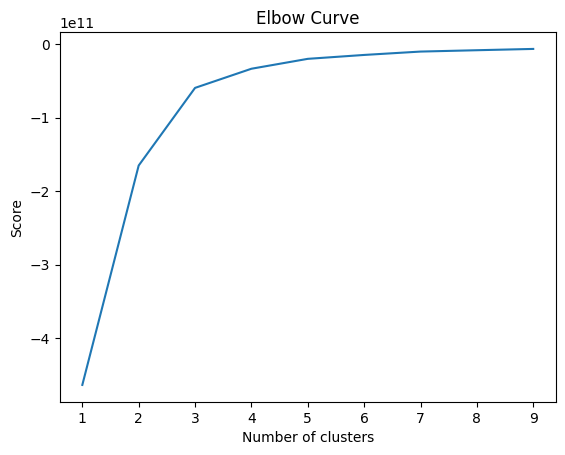

In [17]:
Nc=range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

plt.plot(Nc, score)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")

plt.show()

In [18]:
model = KMeans(n_clusters=3)
model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [19]:
model.labels_

array([1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1,

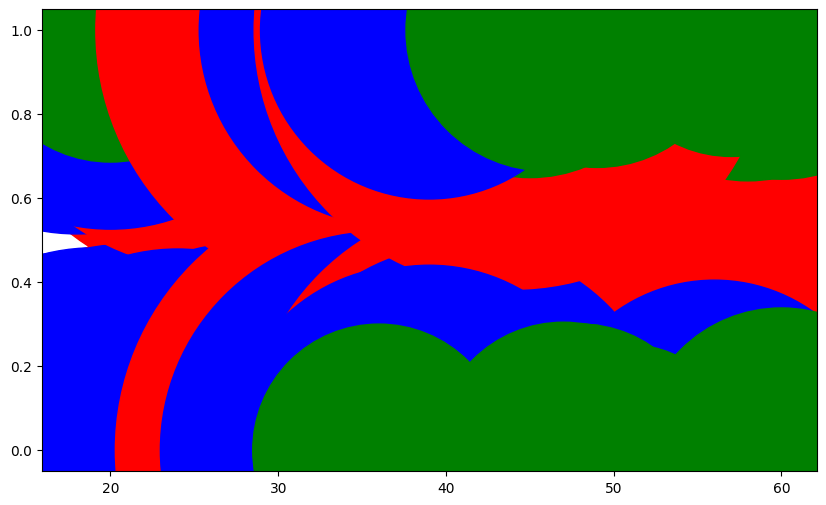

In [20]:
colormap = np.array(["Red", "Green", "Blue"])
plt.figure(figsize=(10,6))
z = plt.scatter(df.Age, df.Gender, df.EstimatedSalary, c = colormap[model.labels_])